In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-movies-dataset/ratings.csv
/kaggle/input/the-movies-dataset/links_small.csv
/kaggle/input/the-movies-dataset/credits.csv
/kaggle/input/the-movies-dataset/keywords.csv
/kaggle/input/the-movies-dataset/movies_metadata.csv
/kaggle/input/the-movies-dataset/ratings_small.csv
/kaggle/input/the-movies-dataset/links.csv


# **The Age of Recommender Systems**

The rapid growth of data collection has led to a new era of information. Data is being used to create more efficient systems and this is where Recommendation Systems come into play.  Recommendation Systems are a type of **information filtering systems** as they improve the quality of search results and provides items that are more relevant to the search item or are realted to the search history of the user.  

They are used to predict the **rating** or **preference** that a user would give to an item. Almost every major tech company has applied them in some form or the other: Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay, and Facebook uses it to recommend pages to like and people to follow. 
Moreover,  companies like Netflix and Spotify  depend highly on the effectiveness of their recommendation engines for their business and sucees.

![](https://i.kinja-img.com/gawker-media/image/upload/s--e3_2HgIC--/c_scale,f_auto,fl_progressive,q_80,w_800/1259003599478673704.jpg)

In this kernel we'll be building a baseline Movie Recommendation System using [TMDB 5000 Movie Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata). For novices like me this kernel will pretty much serve as a foundation in recommendation systems and will provide you with something to start with. 

# **1. Introduction to Recommender Systems** <a class="anchor" id="1"></a>


- [Recommender systems](https://en.wikipedia.org/wiki/Recommender_system) are one of the most popular data science applications today.

- A recommender system is a data science application that is used to predict or offer products to customers based on their past purchase or browsing history.

- At the core, a recommender system employs a machine learning algorithm whose job is to predict user's ratings for a particular entity.

- It is based on the similarity based on the entities or users that previously rated those entities.

- The idea is that similar types of users are likely to have similar ratings for a set of entities.

- Recommender systems have wide variety of applications.

- Many of the big technology companies use a recommender system in some form to recommend products to customers.

- They are used by Amazon for product recommendations, YouTube for video recommendations, Netflix and IMDB for movie recommendations and Facebook for friend recommendations.

- The ability to recommend relevant products or services to users can be very profitable for a company. Hence, it is so common to find this application by many companies.

# **2. Recommender Systems Mechanism** <a class="anchor" id="2"></a>


- In this section, we will focus on recommender systems mechanism, i.e. how a recommender systems work.

- Basically, a recommendation engine filters the data using different algorithms and recommends the most relevant items to users.

- It first studies the past behaviour of a customer and based on that recommends products which he might buy.

- The working of recommender systems is shown in the following diagram-

![Recommender Systems Mechanism](https://miro.medium.com/max/1200/1*yYFoZKYpp7MT_iAqoE1lRw.png)



#### image source : https://medium.com/@sonish.sivarajkumar/recommendation-engine-beginners-guide-aec32708e5b9

- Now, we can recommend products to users in different ways.

- We can recommend items to a user which are most popular among all the users.

- We can divide the users into multiple segments and based on their preferences we recommend items to them.

- The working of a recommendation engine can be categorized in three steps-


1. Data collection
2. Data storage
3. Filtering the data


These steps are explained below:-

## **Data collection** <a class="anchor" id="2.1"></a>


- The first step in building a recommendation engine is data collection.

- There are two forms of data collection techniques employed in recommender systems.

- These are **explicit** and **implicit** forms of data collection.

- **Explicit data** is information that is provided intentionally, i.e. input from the users such as movie ratings.

- **Implicit data** is information that is not provided intentionally but gathered from available data streams like search history, clicks, order history, etc.



### **Examples of explicit data collection include the following**

- Asking a user to rate an item on a sliding scale.

- Asking a user to search.

- Asking a user to rank a collection of items from favorite to least favorite.

- Presenting two items to a user and asking him/her to choose the better one of them.

- Asking a user to create a list of items that he/she likes.



### **Examples of implicit data collection include the following**


- Observing the items that a user views in an online store.

- Analyzing item/user viewing times.

- Keeping a record of the items that a user purchases online.

- Obtaining a list of items that a user has listened to or watched on his/her computer.

- Analyzing the user's social network and discovering similar likes and dislikes.

##  Data storage <a class="anchor" id="2.2"></a>

- The second step in building a recommendation engine is data storage.

- The amount of data storage dictates how good the recommendations of the model are.

- For example, in a movie recommendation system, the more ratings users give to movies, the better the recommendations get for other users.

- The type of data plays an important role in deciding the type of storage that has to be used.

- This type of storage could include a standard SQL database, a NoSQL database or some kind of object storage.

##  Filtering the data <a class="anchor" id="2.3"></a>


- The third and final step in building a recommendation engine is filter the data to extract relevant information required to make final recommendations.

- There are two major approaches to filter the data to extract relevant information. These are as follows:-

- 1. **[Collaborative Filtering](https://en.wikipedia.org/wiki/Collaborative_filtering)** – based on similar users.

- 2. **[Content-Based Filtering](http://recommender-systems.org/content-based-filtering/)** – based on product attributes.

- The difference between the above two approaches are shown in the following diagram-

![Collaborative Vs Content Based Filtering](https://miro.medium.com/max/1064/1*mz9tzP1LjPBhmiWXeHyQkQ.png)



#### image source : https://towardsdatascience.com/brief-on-recommender-systems-b86a1068a4dd

# Step 0: Perform Basic EDA

In [2]:
%matplotlib inline
from IPython.display import Image, HTML
import json
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from wordcloud import WordCloud, STOPWORDS
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Understanding the Dataset**
The dataset above was obtained through the TMDB API. The movies available in this dataset are in correspondence with the movies that are listed in the MovieLens Latest Full Dataset comprising of 26 million ratings on 45,000 movies from 27,000 users. Let us have a look at the features that are available to us.

In [3]:
df = pd.read_csv('/kaggle/input/the-movies-dataset/movies_metadata.csv')
df.head().transpose()
# Transpose is to change cols to rows and vice versa

,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


In [4]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

**Features**
* **adult:** Indicates if the movie is X-Rated or Adult.
* **belongs_to_collection:** A stringified dictionary that gives information on the movie series the particular film belongs to.
* **budget:** The budget of the movie in dollars.
* **genres:** A stringified list of dictionaries that list out all the genres associated with the movie.
* **homepage:** The Official Homepage of the move.
* **id:** The ID of the move.
* **imdb_id:** The IMDB ID of the movie.
* **original_language:** The language in which the movie was originally shot in.
* **original_title:** The original title of the movie.
* **overview:** A brief blurb of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **poster_path:** The URL of the poster image.
* **production_companies:** A stringified list of production companies involved with the making of the movie.
* **production_countries:** A stringified list of countries where the movie was shot/produced in.
* **release_date:** Theatrical Release Date of the movie.
* **revenue:** The total revenue of the movie in dollars.
* **runtime:** The runtime of the movie in minutes.
* **spoken_languages:** A stringified list of spoken languages in the film.
* **status:** The status of the movie (Released, To Be Released, Announced, etc.)
* **tagline:** The tagline of the movie.
* **title:** The Official Title of the movie.
* **video:** Indicates if there is a video present of the movie with TMDB.
* **vote_average:** The average rating of the movie.
* **vote_count:** The number of votes by users, as counted by TMDB.

In [5]:
df.shape

(45466, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

There are a total of **45,466** movies with **24 features**. Most of the features have very few NaN values (apart from homepage and tagline). We will attempt at cleaning this dataset to a form suitable for analysis in the next steps.

# Step 1: Cleaning the data

**Cleaning the Data**: Handling Missing Values and Removing Irrelevant or Duplicate Entries
Cleaning the data is an essential step in preparing the dataset for building a recommendation system. In this task, we will focus on handling missing values, removing irrelevant entries, and eliminating duplicate data.

The data that was originally obtained was in the form of a JSON File. This was converted manually into a CSV file to arrive at an input that could be loaded into a Pandas DataFrame effortlessly. In other words, the dataset we have in our hands is already relatively clean. We will however attempt at learning more about our features and performing appropriate wrangling steps to arrive at a form that is more suitable for analysis.

Let us start by removing the features that are not useful to us.

In [7]:
df = df.drop(['imdb_id'], axis=1)

In [8]:
df[df['original_title'] != df['title']][['title', 'original_title']].head()

,title,original_title
28,The City of Lost Children,La Cité des Enfants Perdus
29,Shanghai Triad,摇啊摇，摇到外婆桥
32,Wings of Courage,"Guillaumet, les ailes du courage"
57,The Postman,Il postino
58,The Confessional,Le confessionnal


The **original title** refers to the title of the movie in the native language in which the movie was shot. As such, I will prefer using the translated, Anglicized name in this analysis and hence, will drop the original titles altogether. We will be able to deduce if the movie is a foreign language film by looking at the **original_language** feature so no tangible information is lost in doing so.

In [9]:
df = df.drop('original_title', axis=1)

This helps in vectorization, tokenization, lemmasation and stop words removal

### Missing values

In [10]:
total_null = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  45466


,Total Missing,In Percent
belongs_to_collection,40972,90.12
homepage,37684,82.88
tagline,25054,55.10
overview,954,2.10
poster_path,386,0.85
runtime,263,0.58
status,87,0.19
release_date,87,0.19
original_language,11,0.02
vote_count,6,0.01


In [11]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,en,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,en,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [12]:
df['vote_count'].fillna(df['vote_count'].mean(), inplace=True)
df['original_language'].fillna(df['original_language'].mode(), inplace=True)
df['release_date'].fillna(df['release_date'].mode(), inplace=True)
df['runtime'].fillna(df['runtime'].mean(), inplace=True)
df['status'].fillna(df['status'].mode(), inplace=True)


In [13]:
df['belongs_to_collection'].fillna('N/A',inplace=True)
df['homepage'].fillna('N/A',inplace=True)
df['tagline'].fillna('N/A',inplace=True)
df['overview'].fillna('N/A',inplace=True)
df['poster_path'].fillna('N/A',inplace=True)
df['status'].fillna(df['status'].mode(),inplace=True)
df['spoken_languages'].fillna(df['status'].mode(),inplace=True)
df['vote_average'].fillna(df['vote_average'].mean(),inplace=True)


In [14]:
df[df['revenue'] == 0].shape

(38052, 22)

We see that the majority of the movies have a recorded revenue of 0. This indicates that we do not have information about the total revenue for these movies. Although this forms the majority of the movies available to us, we will still use revenue as an extremely important feature going forward from the remaining 7000 moves.

In [15]:
df['revenue'] = df['revenue'].replace(0, np.nan)

The **budget** feature has some unclean values that makes Pandas assign it as a generic object. We proceed to convert this into a numeric variable and replace all the non-numeric values with NaN. Finally, as with budget, we will convert all the values of 0 with NaN to indicate the absence of information regarding budget.

In [16]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)
df[df['budget'].isnull()].shape

(36576, 22)

As we move forward trying to answer certain questions, we will have to construct several features suitable for that particular query. For now, we will construct two very important features:

**year:** The year in which the movie was released.
**return:** The ratio of revenue to budget.
The **return** feature is extremely insightful as it will give us a more accurate picture of the financial success of a movie. Presently, our data will not be able to judge if a \$200 million budget movie that earned \$100 million did better than a \$50,000 budget movie taking in \$200,000. This feature will be able to capture that information.

**A return value > 1 would indicate profit whereas a return value < 1 would indicate a loss.**

In [17]:
df['return'] = df['revenue'] / df['budget']
df[df['return'].isnull()].shape

(40085, 23)

We have close to **5000 movies** for which we have data on revenue and budget ratio. This is close to **10% of the entire dataset**. Although this may seem small, this is enough to perform very useful analysis and discover interesting insights about the world of movies.

In [18]:
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [19]:
df['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

**Inference:** There are close to 0 adult movies in this dataset. The adult feature therefore is not of much use to us and can be safely dropped.

In [20]:
df = df.drop('adult', axis=1)

#### Title and Overview Wordclouds
Are there certain words that figure more often in Movie Titles and Movie Blurbs? I suspect there are some words which are considered more potent and considered more worthy of a title.

In [21]:
df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype('str')

In [22]:
title_corpus = ' '.join(df['title'])
overview_corpus = ' '.join(df['overview'])

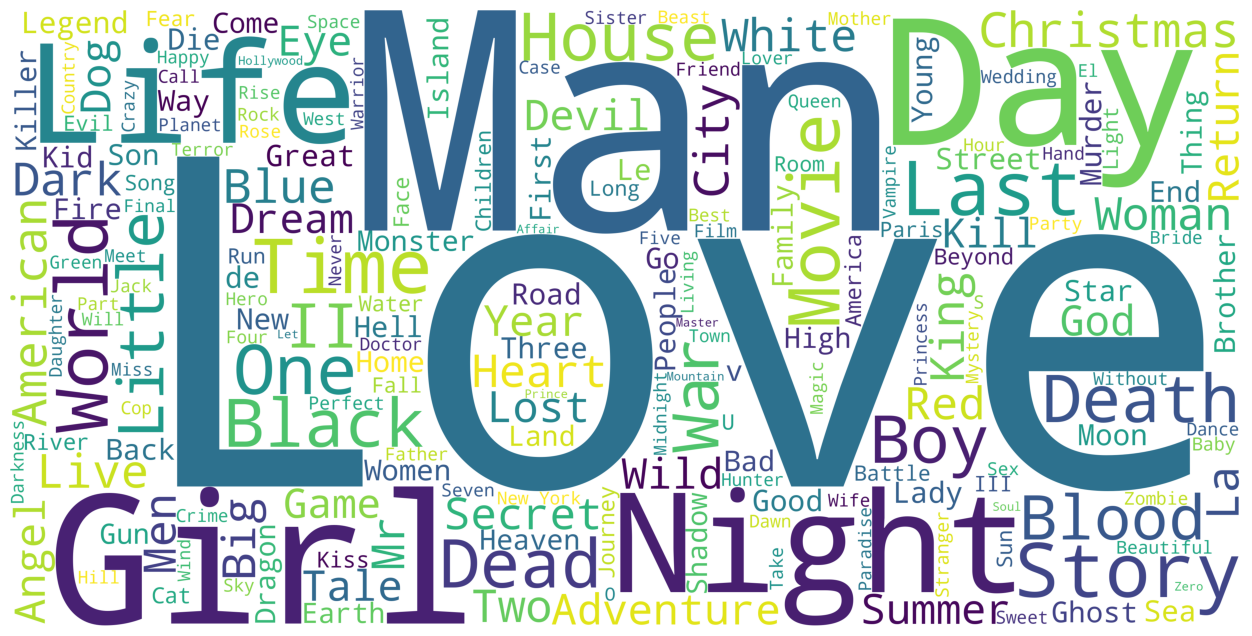

In [23]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

**Inference:** The word Love is the most commonly used word in movie titles. Girl, Day and Man are also among the most commonly occuring words.

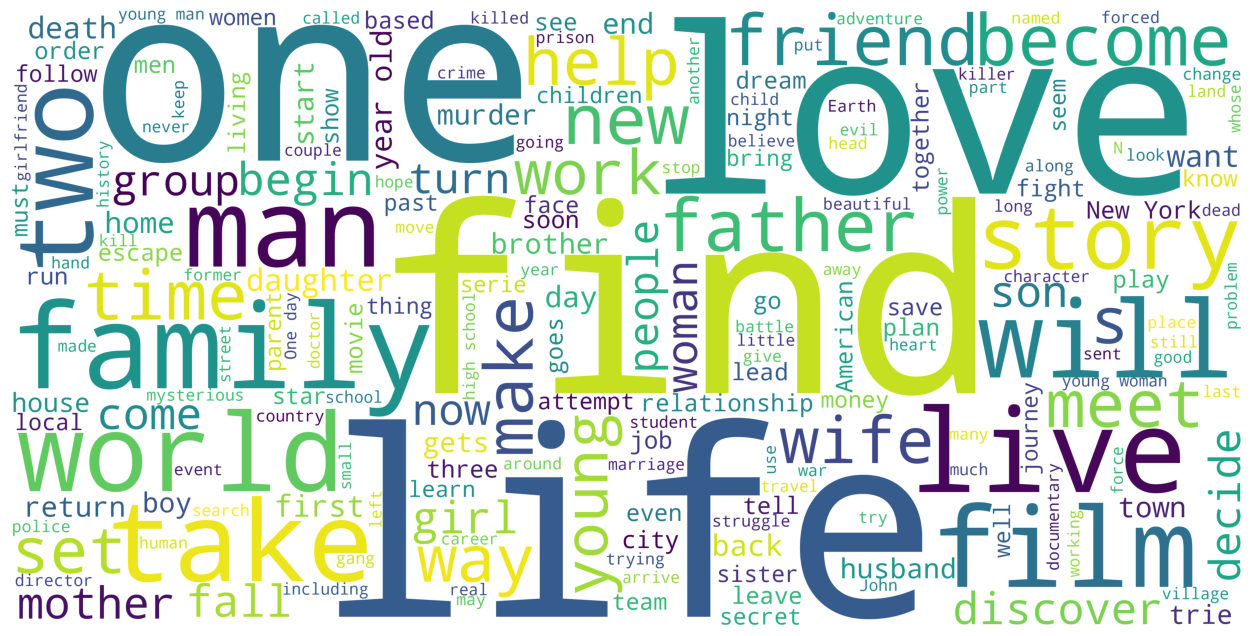

In [24]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

**Inference:** Life is the most commonly used word in Movie titles. One and Find are also popular in Movie Blurbs.

#### Production Countries
The Full MovieLens Dataset consists of movies that are overwhelmingly in the English language (more than 31000). However, these movies may have shot in various locations around the world. It would be interesting to see which countries serve as the most popular destinations for shooting movies by filmmakers, especially those in the United States of America and the United Kingdom.

In [25]:
df['production_countries'] = df['production_countries'].fillna('[]').apply(ast.literal_eval)
df['production_countries'] = df['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [26]:
s = df.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'

In [27]:
con_df = df.drop('production_countries', axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(10)

,num_movies,country
0,21153,United States of America
1,4094,United Kingdom
2,3940,France
3,2254,Germany
4,2169,Italy
5,1765,Canada
6,1648,Japan
7,964,Spain
8,912,Russia
9,828,India


In [28]:
con_df = con_df[con_df['country'] != 'United States of America']

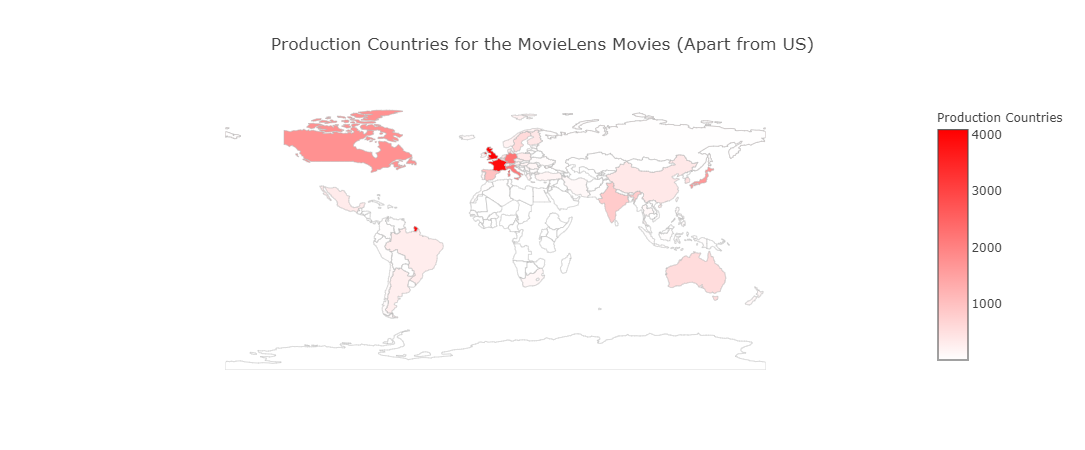

In [29]:
data = [ dict(
        type = 'choropleth',
        locations = con_df['country'],
        locationmode = 'country names',
        z = con_df['num_movies'],
        text = con_df['country'],
        colorscale = [[0,'rgb(255, 255, 255)'],[1,'rgb(255, 0, 0)']],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Production Countries'),
      ) ]

layout = dict(
    title = 'Production Countries for the MovieLens Movies (Apart from US)',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

**Inference:** Unsurprisingly, the United States is the most popular destination of production for movies given that our dataset largely consists of English movies. Europe is also an extremely popular location with the UK, France, Germany and Italy in the top 5. Japan and India are the most popular Asian countries when it comes to movie production.

#### Original Language
In this section, let us look at the languages of the movies in our dataset. From the production countries, we have already deduced that the majority of the movies in the dataset are English. Let us see what the other major languages represented are.

In [30]:
df['original_language'].drop_duplicates().shape[0]

93

In [31]:
lang_df = pd.DataFrame(df['original_language'].value_counts())
lang_df['language'] = lang_df.index
lang_df.columns = ['number', 'language']
lang_df.head()

,number,language
en,32269,en
fr,2438,fr
it,1529,it
ja,1350,ja
de,1080,de


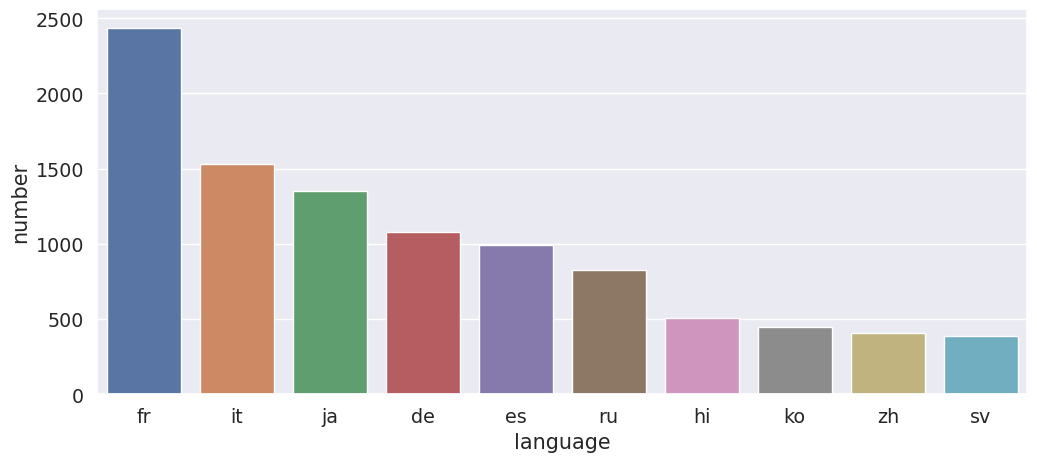

In [32]:
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=lang_df.iloc[1:11])
plt.show()

**Inference:** There are over **93 languages** represented in our dataset. As we had expected, **English language** films form the overwhelmingly majority. **French and Italian** movies come at a very distant second and third respectively.

#### Movie Release Dates
**Release Dates** can often play a very important role in determining the success and the revenue generated by a particular movie. In this section, we will try and gain insights about release dates in terms of years, months and days of the week.

We have already constructed the **year** feature in our preliminary data wrangling step. Let us now extract the month and day too for each movie with a release date.

<Axes: title={'center': 'Number of Movies released in a particular month.'}, xlabel='month', ylabel='count'>

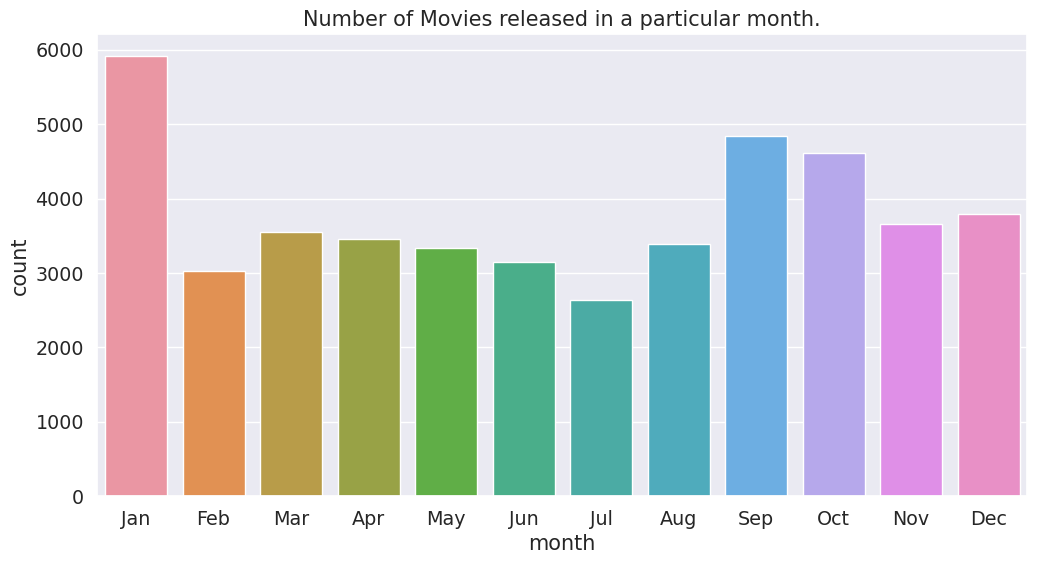

In [33]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan
def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('-'))    
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan
df['day'] = df['release_date'].apply(get_day)
df['month'] = df['release_date'].apply(get_month)
plt.figure(figsize=(12,6))
plt.title("Number of Movies released in a particular month.")
sns.countplot(x='month', data=df, order=month_order)

**Inference:** It appears that **January** is the most popular month when it comes to movie releases. In Hollywood circles, this is also known as the the dump month when sub par movies are released by the dozen.

<Axes: title={'center': 'Number of Movies released on a particular day.'}, xlabel='day', ylabel='count'>

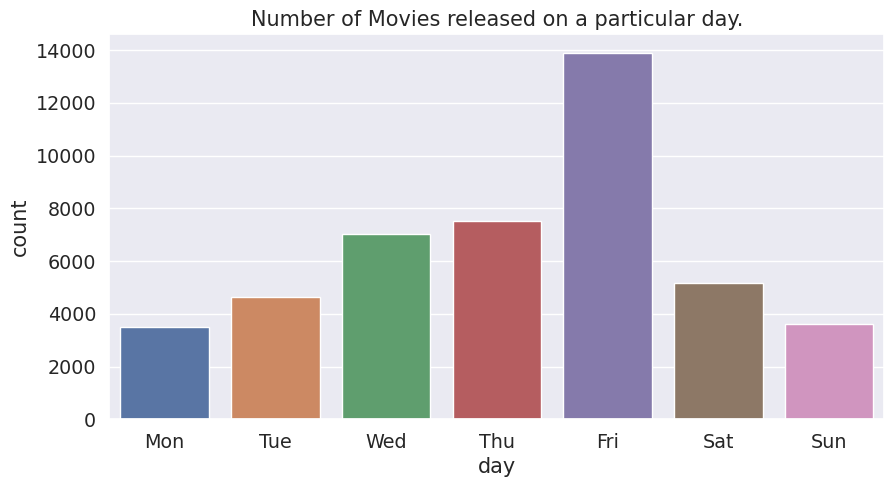

In [34]:
plt.figure(figsize=(10,5))
plt.title("Number of Movies released on a particular day.")
sns.countplot(x='day', data=df, order=day_order)

**Inference:** **Friday** is clearly the most popular day for movie releases. This is understandable considering the fact that it usually denotes the beginning of the weekend. **Sunday and Monday** are the least popular days and this can be attributed to the same aforementioned reason.

#### Genres
The genre is another important feature of a movie.A film genre is a stylistic or thematic category for motion pictures based on similarities either in the narrative elements, aesthetic approach, or the emotional response to the film.

In [35]:
df['genres'] = df['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_df = df.drop('genres', axis=1).join(s)
gen_df['genre'].value_counts().shape[0]

32

**Inference:** TMDB defines 32 different genres for our set of 45,000 movies. Let us now have a look at the most commonly occuring genres in movies.

In [36]:
pop_gen = pd.DataFrame(gen_df['genre'].value_counts()).reset_index()
pop_gen.columns = ['genre', 'movies']
pop_gen.head(10)

,genre,movies
0,Drama,20265
1,Comedy,13182
2,Thriller,7624
3,Romance,6735
4,Action,6596
5,Horror,4673
6,Crime,4307
7,Documentary,3932
8,Adventure,3496
9,Science Fiction,3049


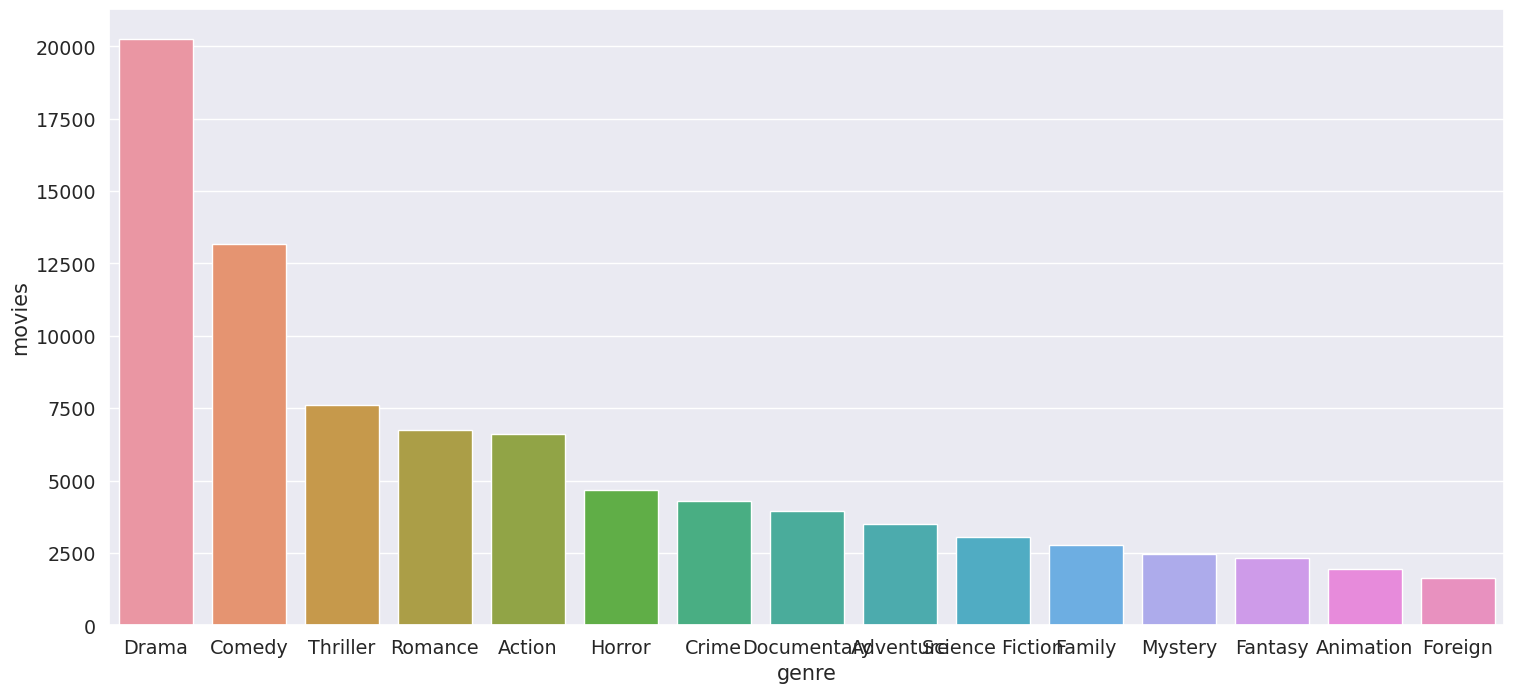

In [37]:
plt.figure(figsize=(18,8))
sns.barplot(x='genre', y='movies', data=pop_gen.head(15))
plt.show()

**Inference:** **Drama** is the most commonly occurring genre with almost half the movies identifying itself as a drama film. **Comedy** comes in at a distant second with 25% of the movies having adequate doses of humor. Other major genres represented in the top 10 are Action, Horror, Crime, Mystery, Science Fiction, Animation and Fantasy.

# Step 2: Content Based Filtering
In **content-based filtering**, we analyze product attributes to understand their characteristics and use them to make recommendations to users. By analyzing these attributes, we can determine similarities between products and generate recommendations based on user preferences.

### **Content Based Filtering**
In this recommender system the content of the movie (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.

![](https://image.ibb.co/f6mDXU/conten.png)

In [38]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

import warnings; warnings.simplefilter('ignore')

In [39]:
links_small = pd.read_csv('/kaggle/input/the-movies-dataset/links_small.csv')
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')

In [42]:
md = pd. read_csv('/kaggle/input/the-movies-dataset/movies_metadata.csv')
md.head()
md = md.drop([19730, 29503, 35587])

In [43]:
md['genres'] = md['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
md['year'] = pd.to_datetime(md['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
md['id'] = md['id'].astype('int')
smd = md[md['id'].isin(links_small)]
smd.shape

(9099, 25)

**Inference:** We have 9099 movies avaiable in our small movies metadata dataset which is 5 times smaller than our original dataset of 45000 movies.

### **Plot description based Recommender**

We will compute pairwise similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score. The plot description is given in the **overview** feature of our dataset. 


In [44]:
smd['tagline'] = smd['tagline'].fillna('')
smd['description'] = smd['overview'] + smd['tagline']
smd['description'] = smd['description'].fillna('')

**We need to convert the word vector of each overview.**
Now we'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.

Now if you are wondering what is term frequency , it is the relative frequency of a word in a document and is given as
   **(term instances/total instances)**.
Inverse Document Frequency is the relative count of documents containing the term is given as 
**log(number of documents/documents with term)**
The overall importance of each word to the documents in which they appear is equal to **TF * IDF**

This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each row represents a movie, as before.This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

Fortunately, scikit-learn gives you a built-in TfIdfVectorizer class that produces the TF-IDF matrix in a couple of lines. That's great, isn't it? 

In [45]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(smd['description'])

## Step 5: Evaluation and Performance Metrics 

### Cosine Similarity
We see that over 20,000 different words were used to describe the 4800 movies in our dataset.

With this matrix in hand, we can now compute a similarity score. There are several candidates for this; such as the euclidean, the Pearson and the [cosine similarity scores](https://en.wikipedia.org/wiki/Cosine_similarity). There is no right answer to which score is the best. Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:
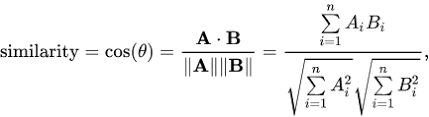

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's **linear_kernel()** instead of cosine_similarities() since it is faster.

In [46]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [47]:
cosine_sim[0]

array([1.        , 0.00680476, 0.        , ..., 0.        , 0.00344913,
       0.        ])

**Inference:** We now have a pairwise cosine similarity matrix for all the movies in our dataset. The next step is to write a function that returns the 30 most similar movies based on the cosine similarity score. 

In [48]:
smd = smd.reset_index()
titles = smd['title']
indices = pd.Series(smd.index, index=smd['title'])

We are now in a good position to define our recommendation function. These are the following steps we'll follow :-
* Get the index of the movie given its title.
* Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
* Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
* Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
* Return the titles corresponding to the indices of the top elements.

In [49]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

# Step 4: Recommendation Generation

In [50]:
get_recommendations('The Godfather').head(10)

973      The Godfather: Part II
8387                 The Family
3509                       Made
4196         Johnny Dangerously
29               Shanghai Triad
5667                       Fury
2412             American Movie
1582    The Godfather: Part III
4221                    8 Women
2159              Summer of Sam
Name: title, dtype: object

In [51]:
get_recommendations('The Dark Knight').head(10)

7931                      The Dark Knight Rises
132                              Batman Forever
1113                             Batman Returns
8227    Batman: The Dark Knight Returns, Part 2
7565                 Batman: Under the Red Hood
524                                      Batman
7901                           Batman: Year One
2579               Batman: Mask of the Phantasm
2696                                        JFK
8165    Batman: The Dark Knight Returns, Part 1
Name: title, dtype: object

**Inference:** We see that for **The Dark Knight**, our system is able to identify it as a Batman film and subsequently recommend other Batman films as its top recommendations. But unfortunately, that is all this system can do at the moment. This is not of much use to most people as it doesn't take into considerations very important features such as cast, crew, director and genre, which determine the rating and the popularity of a movie. Someone who liked **The Dark Knight** probably likes it more because of Nolan and would hate **Batman Forever** and every other substandard movie in the Batman Franchise.

Therefore, we are going to use much more suggestive metadata than **Overview** and **Tagline**. In the next subsection, we will build a more sophisticated recommender that takes **genre**, **keywords**, **cast** and **crew** into consideration.

In [53]:
def precision_at_k(actual_items, recommended_items, k):
    """
    Calculate precision@k for a list of recommendations.
    
    Parameters:
    - actual_items: List of actual items the user interacted with.
    - recommended_items: List of recommended items.
    - k: Number of top recommendations to consider.
    
    Returns:
    - Precision@k value.
    """
    recommended_items = recommended_items[:k]
    common_items = set(actual_items) & set(recommended_items)
    precision = len(common_items) / k if k > 0 else 0
    return precision

def recall_at_k(actual_items, recommended_items, k):
    """
    Calculate recall@k for a list of recommendations.
    
    Parameters:
    - actual_items: List of actual items the user interacted with.
    - recommended_items: List of recommended items.
    - k: Number of top recommendations to consider.
    
    Returns:
    - Recall@k value.
    """
    recommended_items = recommended_items[:k]
    common_items = set(actual_items) & set(recommended_items)
    recall = len(common_items) / len(actual_items) if len(actual_items) > 0 else 0
    return recall

def f1_score(precision, recall):
    """
    Calculate F1-score from precision and recall values.
    
    Parameters:
    - precision: Precision value.
    - recall: Recall value.
    
    Returns:
    - F1-score value.
    """
    if precision + recall > 0:
        f1 = 2 * (precision * recall) / (precision + recall)
    else:
        f1 = 0
    return f1

In [54]:
get_recommendations

<function __main__.get_recommendations(title)>

In [59]:
# Actual Items obtained from User Survey
actual_items = ['The Godfather: Part II', 'Casino', 'Scarface', 'Millers Crossing', 'Gangs of New York', 'Women', 'American Movie', 'American Gangster', 'A Prophet', 'Donnie Brasco']
recommended_items = ['The Godfather: Part II', 'The Family', 'Made, Johnny Dangerously', 'Shanghai Triad', 'Fury', 'American Movie', 'The Godfather: Part III', 'Women', 'Summer of Sam']

# Evaluate precision@k
precision = precision_at_k(actual_items, recommended_items, k=5)
print("Precision@5:", precision)

# Evaluate recall@k
recall = recall_at_k(actual_items, recommended_items, k=5)
print("Recall@5:", recall)

# Calculate F1-score
f1 = f1_score(precision, recall)
print("F1-score:", f1)

Precision@5: 0.2
Recall@5: 0.1
F1-score: 0.13333333333333333


## **Credits, Genres and Keywords Based Recommender**
It goes without saying that the quality of our recommender would be increased with the usage of better metadata. That is exactly what we are going to do in this section. We are going to build a recommender based on the following metadata: the 3 top actors, the director, related genres and the movie plot keywords.

From the cast, crew and keywords features, we need to extract the three most important actors, the director and the keywords associated with that movie. Right now, our data is present in the form of "stringified" lists , we need to convert it into a safe and usable structure

In [60]:
credits = pd.read_csv('/kaggle/input/the-movies-dataset/credits.csv')
keywords = pd.read_csv('/kaggle/input/the-movies-dataset/keywords.csv')

In [61]:
keywords['id'] = keywords['id'].astype('int')
credits['id'] = credits['id'].astype('int')
md['id'] = md['id'].astype('int')

In [62]:
md.shape

(45463, 25)

In [63]:
md = md.merge(credits, on='id')
md = md.merge(keywords, on='id')

In [64]:
smd = md[md['id'].isin(links_small)]
smd.shape

(9219, 28)

We now have our cast, crew, genres and credits, all in one dataframe. Let us wrangle this a little more using the following intuitions:
​
1. **Crew:** From the crew, we will only pick the director as our feature since the others don't contribute that much to the *feel* of the movie.
2. **Cast:** Choosing Cast is a little more tricky. Lesser known actors and minor roles do not really affect people's opinion of a movie. Therefore, we must only select the major characters and their respective actors. Arbitrarily we will choose the top 3 actors that appear in the credits list. 

In [65]:
smd['cast'] = smd['cast'].apply(literal_eval)
smd['crew'] = smd['crew'].apply(literal_eval)
smd['keywords'] = smd['keywords'].apply(literal_eval)
smd['cast_size'] = smd['cast'].apply(lambda x: len(x))
smd['crew_size'] = smd['crew'].apply(lambda x: len(x))

In [66]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [67]:
smd['director'] = smd['crew'].apply(get_director)

In [68]:
smd['cast'] = smd['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
smd['cast'] = smd['cast'].apply(lambda x: x[:3] if len(x) >=3 else x)

In [69]:
smd['keywords'] = smd['keywords'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

These are steps I follow in the preparation of my genres and credits data:
1. **Strip Spaces and Convert to Lowercase** from all our features. This way, our engine will not confuse between **Johnny Depp** and **Johnny Galecki.** 
2. **Mention Director 3 times** to give it more weight relative to the entire cast.

In [70]:
smd['cast'] = smd['cast'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

In [71]:
smd['director'] = smd['director'].astype('str').apply(lambda x: str.lower(x.replace(" ", "")))
smd['director'] = smd['director'].apply(lambda x: [x,x, x])

#### Keywords

We will do a small amount of pre-processing of our keywords before putting them to any use. As a first step, we calculate the frequenct counts of every keyword that appears in the dataset.

In [72]:
s = smd.apply(lambda x: pd.Series(x['keywords']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'keyword'

In [73]:
s = s.value_counts()
s[:5]

independent film        610
woman director          550
murder                  399
duringcreditsstinger    327
based on novel          318
Name: keyword, dtype: int64

**Inference:** Keywords occur in frequencies ranging from 1 to 610. We do not have any use for keywords that occur only once. Therefore, these can be safely removed. Finally, we will convert every word to its stem so that words such as Dogs and Dog are considered the same.

In [74]:
s = s[s > 1]

In [75]:
stemmer = SnowballStemmer('english')
stemmer.stem('dogs')

'dog'

In [76]:
def filter_keywords(x):
    words = []
    for i in x:
        if i in s:
            words.append(i)
    return words

In [77]:
smd['keywords'] = smd['keywords'].apply(filter_keywords)
smd['keywords'] = smd['keywords'].apply(lambda x: [stemmer.stem(i) for i in x])
smd['keywords'] = smd['keywords'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

In [78]:
smd['soup'] = smd['keywords'] + smd['cast'] + smd['director'] + smd['genres']
smd['soup'] = smd['soup'].apply(lambda x: ' '.join(x))

In [79]:
count = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
count_matrix = count.fit_transform(smd['soup'])

In [80]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [81]:
smd = smd.reset_index()
titles = smd['title']
indices = pd.Series(smd.index, index=smd['title'])

We will reuse the get_recommendations function that we had written earlier. Since our cosine similarity scores have changed, we expect it to give us different (and probably better) results. Let us check for **The Dark Knight** again and see what recommendations I get this time around.

In [82]:
get_recommendations('The Dark Knight').head(10)

8031         The Dark Knight Rises
6218                 Batman Begins
6623                  The Prestige
2085                     Following
7648                     Inception
4145                      Insomnia
3381                       Memento
8613                  Interstellar
7659    Batman: Under the Red Hood
1134                Batman Returns
Name: title, dtype: object

**Inference:** The recommendations seem to have recognized other Christopher Nolan movies (due to the high weightage given to director) and put them as top recommendations. I enjoyed watching **The Dark Knight** as well as some of the other ones in the list including **Batman Begins**, **The Prestige** and **The Dark Knight Rises**. 

We can of course experiment on this engine by trying out different weights for our features (directors, actors, genres), limiting the number of keywords that can be used in the soup, weighing genres based on their frequency, only showing movies with the same languages, etc.

In [83]:
get_recommendations('Mean Girls').head(10)

3319               Head Over Heels
4763                 Freaky Friday
1329              The House of Yes
6277              Just Like Heaven
7905         Mr. Popper's Penguins
7332    Ghosts of Girlfriends Past
6959     The Spiderwick Chronicles
8883                      The DUFF
6698         It's a Boy Girl Thing
7377       I Love You, Beth Cooper
Name: title, dtype: object

# **Step 3: Collaborative Filtering**

Our content based engine suffers from some severe limitations. It is only capable of suggesting movies which are close to a certain movie. That is, it is not capable of capturing tastes and providing recommendations across genres.

Also, the engine that we built is not really personal in that it doesn't capture the personal tastes and biases of a user. Anyone querying our engine for recommendations based on a movie will receive the same recommendations for that movie, regardless of who she/he is.

Therefore, in this section, we will use a technique called Collaborative Filtering to make recommendations to Movie Watchers.
It is basically of two types:-

*  **User based filtering**-  These systems recommend products to a user that similar users have liked. For measuring the similarity between two users we can either use pearson correlation or cosine similarity.
This filtering technique can be illustrated with an example. In the following matrixes, each row represents a user, while the columns correspond to different movies except the last one which records the similarity between that user and the target user. Each cell represents the rating that the user gives to that movie. Assume user E is the target.
![](https://cdn-images-1.medium.com/max/1000/1*9NBFo4AUQABKfoUOpE3F8Q.png)

Since user A and F do not share any movie ratings in common with user E, their similarities with user E are not defined in Pearson Correlation. Therefore, we only need to consider user B, C, and D. Based on Pearson Correlation, we can compute the following similarity.
![](https://cdn-images-1.medium.com/max/1000/1*jZIMJzKM1hKTFftHfcSxRw.png)

From the above table we can see that user D is very different from user E as the Pearson Correlation between them is negative. He rated Me Before You higher than his rating average, while user E did the opposite. Now, we can start to fill in the blank for the movies that user E has not rated based on other users.
![](https://cdn-images-1.medium.com/max/1000/1*9TC6BrfxYttJwiATFAIFBg.png)

Although computing user-based CF is very simple, it suffers from several problems. One main issue is that users’ preference can change over time. It indicates that precomputing the matrix based on their neighboring users may lead to bad performance. To tackle this problem, we can apply item-based CF.

* **Item Based Collaborative Filtering** - Instead of measuring the similarity between users, the item-based CF recommends items based on their similarity with the items that the target user rated. Likewise, the similarity can be computed with Pearson Correlation or Cosine Similarity. The major difference is that, with item-based collaborative filtering, we fill in the blank vertically, as oppose to the horizontal manner that user-based CF does. The following table shows how to do so for the movie Me Before You.
![](https://cdn-images-1.medium.com/max/1000/1*LqFnWb-cm92HoMYBL840Ew.png)

It successfully avoids the problem posed by dynamic user preference as item-based CF is more static. However, several problems remain for this method. First, the main issue is ***scalability***. The computation grows with both the customer and the product. The worst case complexity is O(mn) with m users and n items. In addition, ***sparsity*** is another concern. Take a look at the above table again. Although there is only one user that rated both Matrix and Titanic rated, the similarity between them is 1. In extreme cases, we can have millions of users and the similarity between two fairly different movies could be very high simply because they have similar rank for the only user who ranked them both.


In [86]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
reader = Reader()
ratings = pd.read_csv('/kaggle/input/the-movies-dataset/ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


# Step 6: Matrix Factorization

### **Single Value Decomposition**
One way to handle the scalability and sparsity issue created by CF is to leverage a **latent factor model** to capture the similarity between users and items. Essentially, we want to turn the recommendation problem into an optimization problem. We can view it as how good we are in predicting the rating for items given a user. One common metric is Root Mean Square Error (RMSE). **The lower the RMSE, the better the performance**.

Now talking about latent factor you might be wondering what is it ?It is a broad idea which describes a property or concept that a user or an item have. For instance, for music, latent factor can refer to the genre that the music belongs to. SVD decreases the dimension of the utility matrix by extracting its latent factors. Essentially, we map each user and each item into a latent space with dimension r. Therefore, it helps us better understand the relationship between users and items as they become directly comparable. The below figure illustrates this idea.

![](https://cdn-images-1.medium.com/max/800/1*GUw90kG2ltTd2k_iv3Vo0Q.png)

In [89]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8865  0.8892  0.8939  0.8982  0.8776  0.8972  0.9004  0.8822  0.8956  0.8920  0.8913  0.0070  
MAE (testset)     0.6866  0.6809  0.6838  0.6943  0.6763  0.6868  0.6909  0.6755  0.6864  0.6877  0.6849  0.0057  
Fit time          1.53    1.55    1.55    1.55    1.52    1.54    1.55    1.54    1.59    1.57    1.55    0.02    
Test time         0.10    0.10    0.10    0.10    0.11    0.10    0.36    0.10    0.10    0.10    0.13    0.08    


{'test_rmse': array([0.8864753 , 0.88920159, 0.89393192, 0.89820569, 0.87758914,
        0.89716374, 0.90039973, 0.88218206, 0.89557152, 0.89199626]),
 'test_mae': array([0.68664965, 0.68093475, 0.68377684, 0.69428345, 0.67625325,
        0.68676776, 0.6908893 , 0.67551023, 0.6864124 , 0.68772045]),
 'fit_time': (1.5274174213409424,
  1.545691967010498,
  1.5522799491882324,
  1.54913330078125,
  1.5181410312652588,
  1.5368216037750244,
  1.553325891494751,
  1.5370724201202393,
  1.5854127407073975,
  1.5652976036071777),
 'test_time': (0.10409760475158691,
  0.10375642776489258,
  0.1045372486114502,
  0.10204529762268066,
  0.10671663284301758,
  0.1024174690246582,
  0.3646860122680664,
  0.10175633430480957,
  0.10429811477661133,
  0.10358142852783203)}

**Inference:** We get a mean Root Mean Sqaure Error of 0.89 approx which is more than good enough for our case. Let us now train on our dataset and arrive at predictions.

In [90]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [91]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [92]:
svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.7171001353590056, details={'was_impossible': False})

**Inference:** for movie with ID 302, we get an estimated prediction of **2.717**. One startling feature of this recommender system is that it doesn't care what the movie is (or what it contains). It works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have predicted the movie.

# Step 8: Hybrid Recommendation System

### Hybrid Recommender Systems 

- Most recommender systems now use a hybrid approach.
- It means to combine collaborative filtering, content-based filtering and other approaches.
- Hybrid approaches can be implemented in several ways which are as follows:
- By making content-based and collaborative-based predictions separately and then combining them.
- By adding content-based capabilities to a collaborative-based approach (and vice versa) or
- By combining the approaches into one model.
- An example of hybrid recommender systems is Netflix website.
- The website makes recommendations by comparing the watching and searching habits of similar users (collaborative filtering) as well as by offering movies that share characteristics with films that a user has rated highly (content-based filtering).

**Some hybridization techniques include:**

• **Weighted:** Combining the score of different recommendation components numerically.

• **Switching:** Choosing among recommendation components and applying the selected one.

• **Mixed:** Recommendations from different recommenders are presented together to give the recommendation.

• **Feature Combination:** Features derived from different knowledge sources are combined together and given to a single recommendation algorithm.

• **Feature Augmentation:** Computing a feature or set of features, which is then part of the input to the next technique.

• **Cascade:** Recommenders are given strict priority, with the lower priority ones breaking ties in the scoring of the higher ones.

• **Meta-level:** One recommendation technique is applied and produces some sort of model, which is then the input used by the next technique.

In this section, I will try to build a simple hybrid recommender that brings together techniques we have implemented in the content based and collaborative filter based engines. This is how it will work:

* **Input:** User ID and the Title of a Movie
* **Output:** Similar movies sorted on the basis of expected ratings by that particular user.

In [93]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [96]:
o = pd.read_csv('/kaggle/input/the-movies-dataset/links_small.csv')
o.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [97]:
id_map = pd.read_csv('/kaggle/input/the-movies-dataset/links_small.csv')[['movieId', 'tmdbId']]
id_map['tmdbId'] = id_map['tmdbId'].apply(convert_int)
id_map.columns = ['movieId', 'id']
id_map = id_map.merge(smd[['title', 'id']], on='id').set_index('title')
#id_map = id_map.set_index('tmdbId')

In [98]:
indices_map = id_map.set_index('id')

In [99]:
def hybrid(userId, title):
    idx = indices[title]
    tmdbId = id_map.loc[title]['id']
    #print(idx)
    movie_id = id_map.loc[title]['movieId']
    
    sim_scores = list(enumerate(cosine_sim[int(idx)]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = smd.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'year', 'id']]
    movies['est'] = movies['id'].apply(lambda x: svd.predict(userId, indices_map.loc[x]['movieId']).est)
    movies = movies.sort_values('est', ascending=False)
    return movies.head(10)

In [100]:
hybrid(1, 'Avatar')

,title,vote_count,vote_average,year,id,est
1011,The Terminator,4208.0,7.4,1984,218,3.282425
974,Aliens,3282.0,7.7,1986,679,3.257311
522,Terminator 2: Judgment Day,4274.0,7.7,1991,280,3.030598
8401,Star Trek Into Darkness,4479.0,7.4,2013,54138,2.977822
1668,Return from Witch Mountain,38.0,5.6,1978,14822,2.847405
922,The Abyss,822.0,7.1,1989,2756,2.808818
8658,X-Men: Days of Future Past,6155.0,7.5,2014,127585,2.808413
2014,Fantastic Planet,140.0,7.6,1973,16306,2.748586
4347,Piranha Part Two: The Spawning,41.0,3.9,1981,31646,2.631673
344,True Lies,1138.0,6.8,1994,36955,2.628834


In [101]:
hybrid(500, 'Avatar')

,title,vote_count,vote_average,year,id,est
2014,Fantastic Planet,140.0,7.6,1973,16306,3.504560
8401,Star Trek Into Darkness,4479.0,7.4,2013,54138,3.351660
1011,The Terminator,4208.0,7.4,1984,218,3.321626
974,Aliens,3282.0,7.7,1986,679,3.315378
1376,Titanic,7770.0,7.5,1997,597,3.292317
2132,Superman II,642.0,6.5,1980,8536,3.167952
831,Escape to Witch Mountain,60.0,6.5,1975,14821,3.156054
3060,Sinbad and the Eye of the Tiger,39.0,6.3,1977,11940,3.066336
8658,X-Men: Days of Future Past,6155.0,7.5,2014,127585,3.047775
4017,Hawk the Slayer,13.0,4.5,1980,25628,2.970781


**Inference:** We see that for our hybrid recommender, we get different recommendations for different users although the movie is the same. Hence, our recommendations are more personalized and tailored towards particular users.

# Step 10: Scalability and Performance Optimization

**Scalability** 
- refers to the system's ability to handle increasing data and user traffic efficiently, while performance optimization aims to enhance the system's speed and responsiveness. By investigating these techniques, we can ensure that our recommendation system is capable of handling large-scale data and delivering recommendations in a timely manner. Let's dive into the step-by-step process.

### Step 1: Identify Performance Bottlenecks
Before we can optimize our recommendation system, it's crucial to identify the areas that are causing performance bottlenecks. By pinpointing these bottlenecks, we can focus our efforts on optimizing the most critical components. Here are some common areas to consider:

1. **Data processing and storage:** Analyze how data is processed and stored within the recommendation system. Look for any inefficiencies or slow queries that might impact performance.

2. **Algorithmic complexity:** Evaluate the complexity of the recommendation algorithms used. Some algorithms may perform poorly on large datasets, resulting in slower recommendations.

3. **Resource utilization:** Assess how system resources, such as CPU and memory, are being utilized. Identify any resource-intensive tasks or bottlenecks.

4. **Network latency:** Examine the network communication between different components of the recommendation system. Slow network connections can hinder performance.

By analyzing these areas, we can gain insights into the specific aspects that require optimization.

### Step 2: Data Partitioning and Sharding
One approach to improving scalability is **data partitioning and sharding**. This technique involves dividing the data into smaller subsets and distributing them across multiple machines or servers. By doing so, we can parallelize the processing and storage of data, enabling the system to handle larger volumes efficiently. Follow these steps to implement data partitioning and sharding:

1. **Identify key data entities:** Determine the primary entities in your recommendation system, such as users, items, or interactions. These entities will form the basis for partitioning.

2. **Choose a partitioning strategy:** Select a partitioning strategy based on the characteristics of your data and system requirements. Common partitioning strategies include range partitioning, hash partitioning, or round-robin partitioning.

3. **Implement partitioning logic:** Modify your data storage and retrieval mechanisms to support partitioning. This might involve updating your database schema, adjusting queries, or introducing a distributed storage system.

4. **Distribute data across nodes:** Assign data partitions to different nodes or servers in a distributed environment. Ensure that the distribution is balanced to evenly distribute the workload.

By partitioning and sharding data, we can distribute the processing and storage load across multiple machines, enabling the system to handle larger datasets more efficiently.

### Step 3: Adopt Distributed Computing Frameworks
To achieve scalability and improved performance, consider leveraging distributed computing frameworks like Apache Spark. These frameworks provide a unified platform for processing large-scale data in a distributed and parallel manner. Follow these steps to adopt a distributed computing framework:

1. **Evaluate available frameworks:** Research and evaluate different distributed computing frameworks based on your project requirements. Apache Spark is a popular choice due to its scalability, fault-tolerance, and rich set of libraries.

2. **Install and configure the framework:** Install the chosen distributed computing framework on your system or set up a cluster if required. Follow the official documentation for installation and configuration instructions.

3. **Integrate data processing with the framework:** Modify your recommendation system to leverage the distributed computing framework for data processing tasks. This may involve rewriting certain algorithms or adapting data pipelines to utilize the framework's APIs.

4. **Optimize processing pipelines:** Fine-tune your data processing pipelines to take advantage of the distributed computing framework's capabilities. Use features like parallel processing, in-memory caching, and optimized data partitioning to improve performance.

By adopting a distributed computing framework, we can distribute the computational load across a cluster of machines, enabling faster and more scalable processing of recommendation tasks.

### Step 4: Implement Caching Mechanisms
Caching can significantly improve the performance of a recommendation system by reducing the need to compute recommendations repeatedly. By storing frequently accessed data or intermediate results in a cache, we can serve recommendations faster. Follow these steps to implement caching mechanisms:

1. **Identify cacheable data:** Determine the data that can be cached to improve recommendation retrieval. This may include precomputed similarity matrices, frequently accessed user or item profiles, or popular recommendations.

2. **Choose a caching solution:** Select a caching solution that suits your requirements, such as Redis or Memcached. These solutions offer fast in-memory storage and retrieval of cached data.

3. **Integrate caching logic:** Modify your recommendation system to incorporate caching logic. Implement mechanisms to check if the requested data is available in the cache and retrieve it from there if possible.

4. **Set cache expiration and eviction policies:** Define expiration and eviction policies for cached data to ensure freshness and optimize cache utilization. This may involve setting expiration times or using LRU (Least Recently Used) strategies.

By implementing caching mechanisms, we can reduce the computational overhead of recommendation tasks and improve response times, especially for frequently accessed data.

### Step 5: Monitor and Fine-Tune Performance
After implementing optimization techniques, it's crucial to monitor the performance of the recommendation system and fine-tune as necessary. Follow these steps to monitor and fine-tune performance:

1. **Set up performance monitoring:** Use monitoring tools and frameworks to track system metrics such as response time, throughput, and resource utilization. This will help identify any performance regressions or bottlenecks.

2. **Conduct load testing:** Simulate high user traffic and workload scenarios to assess the system's performance under stress. Identify any limitations or areas that require further optimization.

3. **Analyze performance metrics:** Continuously analyze the performance metrics collected during monitoring and load testing. Look for patterns, trends, or anomalies that indicate areas for improvement.

4. **Iterate and optimize:** Based on the analysis, make iterative improvements to the recommendation system. This may involve adjusting caching strategies, refining data partitioning schemes, or fine-tuning algorithmic parameters.

By actively monitoring and fine-tuning the performance of the recommendation system, we can ensure its scalability and responsiveness, delivering an optimal user experience.

# Conclusion

## Conclusion

In this notebook, I have built 3 different recommendation engines based on different ideas and algorithms. They are as follows:

1. **Content Based Recommender:** We built two content based engines; one that took movie overview and taglines as input and the other which took metadata such as cast, crew, genre and keywords to come up with predictions. We also deviced a simple filter to give greater preference to movies with more votes and higher ratings.
2. **Collaborative Filtering:** We used the powerful Surprise Library to build a collaborative filter based on single value decomposition. The RMSE obtained was less than 1 and the engine gave estimated ratings for a given user and movie.
3. **Hybrid Engine:** We brought together ideas from content and collaborative filterting to build an engine that gave movie suggestions to a particular user based on the estimated ratings that it had internally calculated for that user.

### Step 7: Real-Time Recommendation Generation

To enhance the recommendation system to provide real-time recommendations as users interact with the e-commerce platform, we perform real-time recommendations. 
****This has not been performed in this project. ****

In [102]:
print('Hope You like this project. Thank You')

Hope You like this project. Thank You


# End Of Project